In [ ]:
# This module is purely based on selenium
# In later stage, when i was looking for the documentation i dicovered helium which provides the wrapper around selenium

In [43]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords

# Module 1.1

1. This module collects information about most popular news in recent time.
2. Here, data from 'WION' news channel is collected.
3. The data consists of recent news topic, duration of video, views, upload date.
4. From this data, information is collected and analysis is done.

In [192]:
channel_name='wion'
url='https://www.youtube.com/c/'+channel_name+'/videos'
print(url)

https://www.youtube.com/c/wion/videos


In [213]:
# Initializing driver

driver = webdriver.Chrome()
wait = WebDriverWait(driver, 3)
presence = EC.presence_of_element_located
visible = EC.visibility_of_element_located

# Navigate to url 

driver.get(url)
driver.maximize_window()
driver.implicitly_wait(3)
time.sleep(2)

# Sorting by most popular

driver.find_element_by_id("icon-label").click()
time.sleep(1)
sort=driver.find_element_by_xpath("""/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse[1]/ytd-two-column-browse-results-renderer/div[1]/ytd-section-list-renderer/div[1]/div[2]/ytd-channel-sub-menu-renderer/div[2]/yt-sort-filter-sub-menu-renderer/yt-dropdown-menu/tp-yt-paper-menu-button/tp-yt-iron-dropdown/div/div/tp-yt-paper-listbox/a[1]/tp-yt-paper-item/tp-yt-paper-item-body/div[1]""")
sort.click()

# Scrolling to get top 1000 news title

prev_h=0
while True:
    height = driver.execute_script("""
                function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
    driver.execute_script(f"window.scrollTo({prev_h},{prev_h + 300})")
    time.sleep(0.5)
    prev_h +=400  
    if prev_h >= 125000:
        break
box=[i.text for i in driver.find_elements_by_id('dismissible')]
driver.quit()       

In [214]:
len(box)

998

In [305]:
box[69].split('\n')

['1:44',
 'Russia releases video claiming an attack on military site | Russia Ukraine Conflict | English News',
 '2.1M views',
 '3 months ago']

In [283]:
duration=[]
news_heading=[]
views=[]
upload_time=[]
for i in box:
    dummy=i.split('\n')
    if len(dummy)<=3:
        pass
    else:
        duration.append(dummy[0])
        news_heading.append(dummy[1])
        views.append(dummy[2].split()[0])
        upload_time.append(dummy[3])

In [217]:
len(duration)

991

In [218]:
len(news_heading)

991

In [219]:
len(views)

991

In [220]:
len(upload_time)

991

In [284]:
data=pd.DataFrame({
    'News_Heading':news_heading,
    'Duration':duration,
    'Views':views,
    'Upload_Datetime':upload_time
})

data.head()  

,News_Heading,Duration,Views,Upload_Datetime
0,Gravitas Plus | Explained: The Russia-Ukraine ...,9:26,26M,3 months ago
1,Russian President Vladimir Putin sets conditio...,1:53,6.1M,3 months ago
2,Gravitas: Belarus leader's blunder reveals Put...,5:54,6M,3 months ago
3,WION Ground Report: Kabul's first morning unde...,5:25,5.7M,10 months ago
4,"What happened, when Trump didn't know he was a...",2:59,5.5M,2 years ago


In [222]:
data.tail()

,News_Heading,Duration,Views,Upload_Datetime
986,US plans to deploy additional troops to fortif...,7:58,472K,4 months ago
987,Why is China encouraging bulk buying?,3:39,471K,7 months ago
988,"After Gurmeet Ram Rahim found guilty, violence...",2:48,472K,4 years ago
989,Syrian missile lands near Israel's nuclear rea...,1:13,471K,1 year ago
990,Gravitas: The virus reaches India's children,2:20,471K,1 year ago


In [285]:
x=data['Upload_Datetime'][0]
x

'3 months ago'

In [225]:
x.split()

['3', 'months', 'ago']

In [286]:
upt=[]
for i in data['Upload_Datetime']:
    lst=i.split('Streamed',1)[-1].strip().split()
    if 'minutes' in lst:
        upt.append(1)
    elif 'minute' in lst:
        upt.append(1)
    elif 'day' in lst:
        upt.append(int(lst[0]))
    elif 'days' in lst:
        upt.append(int(lst[0]))
    elif 'week' in lst:
        upt.append(int(lst[0])*7)
    elif 'weeks' in lst:
        upt.append(int(lst[0])*7)
    elif 'month' in lst:
        upt.append(int(lst[0])*30)
    elif 'months' in lst:
        upt.append(int(lst[0])*30)
    elif 'year' in lst:
        upt.append(int(lst[0])*12*30)
    elif 'years' in lst:
        upt.append(int(lst[0])*12*30)   

In [246]:
lst

['1', 'year', 'ago']

In [255]:
ss=[]

In [256]:
if 'year' in lst:
    ss.append(int(lst[0])*365)
ss

[365]

In [287]:
data['Days_from_upload']=upt
data.head()

,News_Heading,Duration,Views,Upload_Datetime,Days_from_upload
0,Gravitas Plus | Explained: The Russia-Ukraine ...,9:26,26M,3 months ago,90
1,Russian President Vladimir Putin sets conditio...,1:53,6.1M,3 months ago,90
2,Gravitas: Belarus leader's blunder reveals Put...,5:54,6M,3 months ago,90
3,WION Ground Report: Kabul's first morning unde...,5:25,5.7M,10 months ago,300
4,"What happened, when Trump didn't know he was a...",2:59,5.5M,2 years ago,720


In [269]:
data.tail()

,News_Heading,Duration,Views,Upload_Datetime,Days_from_upload
986,US plans to deploy additional troops to fortif...,7:58,472K,4 months ago,120
987,Why is China encouraging bulk buying?,3:39,471K,7 months ago,210
988,"After Gurmeet Ram Rahim found guilty, violence...",2:48,472K,4 years ago,1440
989,Syrian missile lands near Israel's nuclear rea...,1:13,471K,1 year ago,360
990,Gravitas: The virus reaches India's children,2:20,471K,1 year ago,360


In [289]:
clean_views=[]
for i in data.Views:
    dum=list(i)
    if 'K' in dum:
        clean_views.append(float(i.split('K')[0])*1000)
    elif 'M' in dum:
        clean_views.append(float(i.split('M')[0])*1000000)
    else:
        clean_views.append(float(i.split()[0]))
    

In [290]:
data['Clean_views']=clean_views
data.head()

,News_Heading,Duration,Views,Upload_Datetime,Days_from_upload,Clean_views
0,Gravitas Plus | Explained: The Russia-Ukraine ...,9:26,26M,3 months ago,90,26000000.0
1,Russian President Vladimir Putin sets conditio...,1:53,6.1M,3 months ago,90,6100000.0
2,Gravitas: Belarus leader's blunder reveals Put...,5:54,6M,3 months ago,90,6000000.0
3,WION Ground Report: Kabul's first morning unde...,5:25,5.7M,10 months ago,300,5700000.0
4,"What happened, when Trump didn't know he was a...",2:59,5.5M,2 years ago,720,5500000.0


In [277]:
data.tail()

,News_Heading,Duration,Views,Upload_Datetime,Days_from_upload,Clean_views
986,US plans to deploy additional troops to fortif...,7:58,472K,4 months ago,120,472000.0
987,Why is China encouraging bulk buying?,3:39,471K,7 months ago,210,471000.0
988,"After Gurmeet Ram Rahim found guilty, violence...",2:48,472K,4 years ago,1440,472000.0
989,Syrian missile lands near Israel's nuclear rea...,1:13,471K,1 year ago,360,471000.0
990,Gravitas: The virus reaches India's children,2:20,471K,1 year ago,360,471000.0


In [291]:
data['Views_per_day']=round(data['Clean_views']/data['Days_from_upload'])
data.head()

,News_Heading,Duration,Views,Upload_Datetime,Days_from_upload,Clean_views,Views_per_day
0,Gravitas Plus | Explained: The Russia-Ukraine ...,9:26,26M,3 months ago,90,26000000.0,288889.0
1,Russian President Vladimir Putin sets conditio...,1:53,6.1M,3 months ago,90,6100000.0,67778.0
2,Gravitas: Belarus leader's blunder reveals Put...,5:54,6M,3 months ago,90,6000000.0,66667.0
3,WION Ground Report: Kabul's first morning unde...,5:25,5.7M,10 months ago,300,5700000.0,19000.0
4,"What happened, when Trump didn't know he was a...",2:59,5.5M,2 years ago,720,5500000.0,7639.0


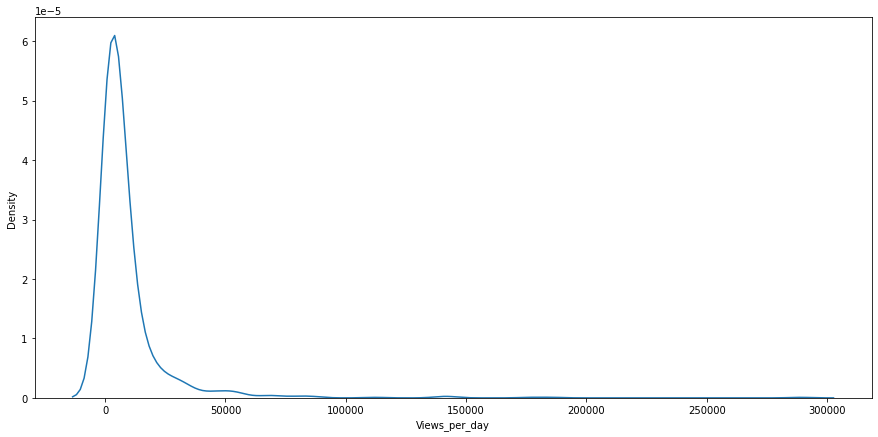

In [306]:
plt.figure(figsize=(15,7))
sns.kdeplot(data['Views_per_day']);

In [309]:
data['Clean_views_in_K']=data['Clean_views']/1000

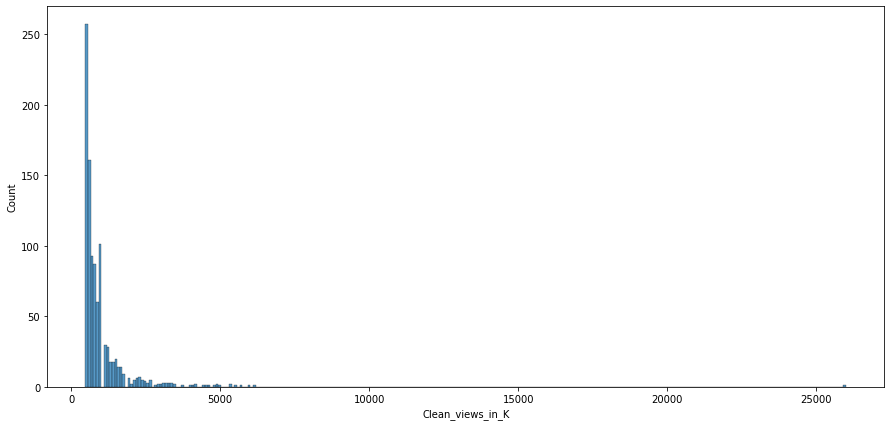

In [310]:
plt.figure(figsize=(15,7))
sns.histplot(data['Clean_views_in_K']);

In [293]:
data.describe()

,Days_from_upload,Clean_views,Views_per_day
count,991.000000,9.910000e+02,991.000000
mean,302.386478,1.000441e+06,9050.504541
std,305.495109,1.098755e+06,18290.046945
min,6.000000,4.710000e+05,283.000000
25%,90.000000,5.540000e+05,1836.000000
50%,240.000000,7.070000e+05,3927.000000
75%,360.000000,1.000000e+06,8667.000000
max,1800.000000,2.600000e+07,288889.000000


In [303]:
target_vdo=data[data['Clean_views']==max(data['Clean_views'])].loc[0,'News_Heading']
target_vdo

'Gravitas Plus | Explained: The Russia-Ukraine crisis'

In [311]:
data.to_csv('Scraped_comments.csv')

In [2]:
df=pd.read_csv('Scraped_comments.csv')
df.head()

,Unnamed: 0,News_Heading,Duration,Views,Upload_Datetime,Days_from_upload,Clean_views,Views_per_day,Clean_views_in_K
0,0,Gravitas Plus | Explained: The Russia-Ukraine ...,9:26,26M,3 months ago,90,26000000.0,288889.0,26000.0
1,1,Russian President Vladimir Putin sets conditio...,1:53,6.1M,3 months ago,90,6100000.0,67778.0,6100.0
2,2,Gravitas: Belarus leader's blunder reveals Put...,5:54,6M,3 months ago,90,6000000.0,66667.0,6000.0
3,3,WION Ground Report: Kabul's first morning unde...,5:25,5.7M,10 months ago,300,5700000.0,19000.0,5700.0
4,4,"What happened, when Trump didn't know he was a...",2:59,5.5M,2 years ago,720,5500000.0,7639.0,5500.0


In [6]:
news_list=list(df['News_Heading'])
news_list

['Gravitas Plus | Explained: The Russia-Ukraine crisis',
 "Russian President Vladimir Putin sets conditions to end Moscow's invasion in Ukraine | English News",
 "Gravitas: Belarus leader's blunder reveals Putin's masterplan",
 "WION Ground Report: Kabul's first morning under Taliban rule, Afghan's national flag lowered | News",
 "What happened, when Trump didn't know he was already LIVE ! | Some Unseen Footages | US President",
 "This Syrian child's message to the world will break your heart",
 'Gravitas Plus: Which countries could go the Sri Lanka way',
 'US President Joe Biden caught cursing journalist on hot microphone | Latest English News | WION News',
 'Gravitas Plus: Did NATO push Ukraine into war?',
 "Gravitas: Wuhan CoronaVirus | Pictures that China doesn't want you to see | World News|Corona Update",
 'Gravitas: The interview China tried to hide | Wuhan Coronavirus | Dr. Ai Fen',
 'Xi Jinping delivers his strongest statement on Russia-Ukraine conflict | International News | 

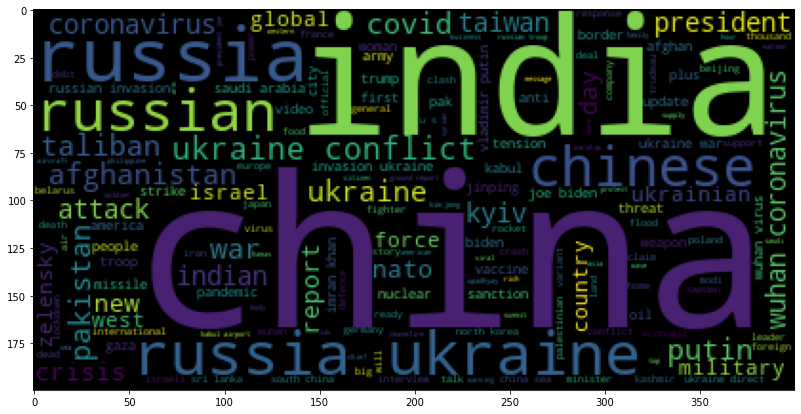

In [11]:
tokenized=[nltk.pos_tag(word_tokenize(i)) for i in news_list]
raw_text=[]
for i in tokenized:
    for j in i:
        if (j[1]=='NN') or (j[1]=='NNP') or (j[1]=='NNS') or (j[1]=='NNPS') or (j[1]=='JJ'):
            raw_text.append(j[0])

# Lemmatizing

lem=WordNetLemmatizer()

# cleaning the data for analysis

def cleaned_review(text):
    text_no=text.lower()
    text_no=re.sub(r"[^a-zA-Z]",' ',text_no)
    text_no=re.sub(r"\s+"," ",text_no)
    text_no=lem.lemmatize(text_no)
    if len(text_no)>2:
        return text_no 

    
final=[cleaned_review(i) for i in raw_text if cleaned_review(i) is not None]

# Generating Wordcloud

plt.figure(figsize=(15,7))
a1=WordCloud().generate(' '.join(i for i in final if i.lower() not in ('gravitas','news','exclusive','english','wion','latest','live','reports','world','palki','sharma')))
plt.imshow(a1);

In [12]:
target_vdo=df[df['Clean_views']==max(df['Clean_views'])].loc[0,'News_Heading']
target_vdo

'Gravitas Plus | Explained: The Russia-Ukraine crisis'

# Module 1.2

In [14]:
print(target_vdo)
url='https://www.youtube.com/results?search_query={}'.format(target_vdo)
print(url)

Gravitas Plus | Explained: The Russia-Ukraine crisis
https://www.youtube.com/results?search_query=Gravitas Plus | Explained: The Russia-Ukraine crisis


In [62]:
# Initializing driver
#option = webdriver.ChromeOptions()
#option.add_argument("--headless")
driver = webdriver.Chrome()  # options=option

print('Initializing driver....')
wait = WebDriverWait(driver, 3)
presence = EC.presence_of_element_located
visible = EC.visibility_of_element_located

#option = webdriver.FirefoxOptions()
#option.add_argument("--headless")
#driver = webdriver.Firefox(options=option)

# Navigate to url 
print('Driver initalized successfully....')
print('getting URL ....')
driver.get(url)
print('URL fetched....')
driver.maximize_window()
driver.implicitly_wait(3)
driver.find_element_by_id("video-title").click()
time.sleep(2)
print('Video selected....')
driver.execute_script('window.scrollTo(0,300);')
time.sleep(1)
print('wait....')
button=driver.find_element_by_id("icon-label")
button.click()
time.sleep(1)
# Scrolling to get top 1000 comments

sort=driver.find_element_by_xpath("/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/ytd-comments/ytd-item-section-renderer/div[1]/ytd-comments-header-renderer/div[1]/span/yt-sort-filter-sub-menu-renderer/yt-dropdown-menu/tp-yt-paper-menu-button/tp-yt-iron-dropdown/div/div/tp-yt-paper-listbox/a[1]")
sort.click()
print('Comments sorted by top comments......')


print('Loading started........')
prev_h=0
for i in tqdm(range(1000)):
#while True:
    height = driver.execute_script("""
                function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
    driver.execute_script(f"window.scrollTo({prev_h},{prev_h + 400})")
    time.sleep(0.2)
    prev_h +=400  
    #if prev_h >= 25000000:
        #break
print('Loading completed....')
print('Scrapping started........')
com=[i.text for i in driver.find_elements_by_id('comment')]
html=driver.page_source
print('Scraping done successfully.....')
driver.quit()   

Initializing driver....
Driver initalized successfully....
getting URL ....
URL fetched....
Video selected....
wait....


  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Comments sorted by top comments......
Loading started........


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:18<00:00,  2.28it/s]


Loading completed....
Scrapping started........
Scraping done successfully.....


In [63]:
len(com)

2083

In [58]:
driver.quit()

In [65]:
com[0].split('\n')

['Bo Hodiak',
 '3 months ago',
 'I am a Ukrainian-American, fluent in Ukrainian and a retired journalist. I want to thank you for a superb explanation. In such a brief amount of time you covered everything important and completely accurately. Thank you.',
 '21K',
 'REPLY']